Update intensity = updates per enrolment

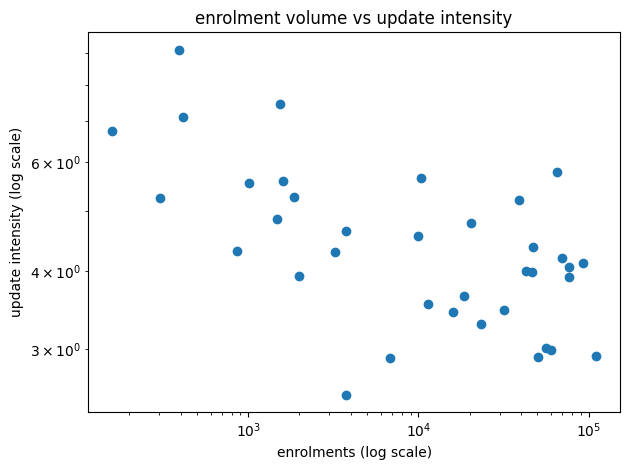

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
demographic_df=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
biometric_df=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

enrolments=enrolment_df.groupby("state").size()
updates=pd.concat([demographic_df,biometric_df]).groupby("state").size()

intensity=(updates/enrolments).dropna()

df=pd.DataFrame({
    "enrolments":enrolments,
    "update_intensity":intensity
}).dropna()

plt.figure()
plt.scatter(df["enrolments"],df["update_intensity"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("enrolments (log scale)")
plt.ylabel("update intensity (log scale)")
plt.title("enrolment volume vs update intensity")
plt.tight_layout()
plt.show()
